In [1]:
!ls

datalab


# Downloading the Dataset from Kaggle using Kaggle CLI

In [2]:
# Install the Kaggle CLI
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle


In [3]:
# Import kaggle.json from google drive
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
    q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
# print(kaggle_api_key)
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [4]:
# Download the dataset from the competition Planet: Understanding the Amazon from Space
!kaggle competitions download -c planet-understanding-the-amazon-from-space -w -f train-jpg.tar.7z
!kaggle competitions download -c planet-understanding-the-amazon-from-space -w -f train_v2.csv.zip
!ls

train-jpg.tar.7z: Downloaded 600MB of 600MB to .
train_v2.csv.zip: Downloaded 159KB of 159KB to .
datalab  train-jpg.tar.7z  train_v2.csv.zip


In [5]:

# Extract the 7z and tar files to get the images
# Installing p7zip
!apt-get install p7zip-full

# Extracting Train Data
!p7zip -d train-jpg.tar.7z
!tar -xvf train-jpg.tar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,467 kB of archives.
After this operation, 5,415 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip amd64 16.02+dfsg-4 [348 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip-full amd64 16.02+dfsg-4 [1,119 kB]
Fetched 1,467 kB in 0s (12.1 MB/s)
Selecting previously unselected package p7zip.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip (16.02+dfsg-4) ...
Selecting previously unselected package p7zip-full.
Preparing to unpack .../p7zip-full_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip-full (

                     32% - train-jpg.tar                     33% - train-jpg.tar                     34% - train-jpg.tar                     35% - train-jpg.tar                     36% - train-jpg.tar                     37% - train-jpg.tar                     38% - train-jpg.tar                     39% - train-jpg.tar                     40% - train-jpg.tar                     41% - train-jpg.tar                     42% - train-jpg.tar                     43% - train-jpg.tar                    

                     81% - train-jpg.tar                     82% - train-jpg.tar                     83% - train-jpg.tar                     84% - train-jpg.tar                     85% - train-jpg.tar                     86% - train-jpg.tar                     87% - train-jpg.tar                     88% - train-jpg.tar                     89% - train-jpg.tar                     90% - train-jpg.tar                     91% - train-jpg.tar                     92% - train-jpg.tar                    

train-jpg/train_28713.jpg
train-jpg/train_23576.jpg
train-jpg/train_33747.jpg
train-jpg/train_18986.jpg
train-jpg/train_6386.jpg
train-jpg/train_37361.jpg
train-jpg/train_3827.jpg
train-jpg/train_4705.jpg
train-jpg/train_20409.jpg
train-jpg/train_1609.jpg
train-jpg/train_34819.jpg
train-jpg/train_40475.jpg
train-jpg/train_5729.jpg
train-jpg/train_8076.jpg
train-jpg/train_10330.jpg
train-jpg/train_25612.jpg
train-jpg/train_74.jpg
train-jpg/train_34341.jpg
train-jpg/train_12955.jpg
train-jpg/train_25497.jpg
train-jpg/train_36821.jpg
train-jpg/train_18107.jpg
train-jpg/train_36386.jpg
train-jpg/train_39094.jpg
train-jpg/train_3756.jpg
train-jpg/train_7419.jpg
train-jpg/train_24944.jpg
train-jpg/train_13520.jpg
train-jpg/train_10587.jpg
train-jpg/train_40109.jpg
train-jpg/train_24014.jpg
train-jpg/train_972.jpg
train-jpg/train_38738.jpg
train-jpg/train_14708.jpg
train-jpg/train_314.jpg
train-jpg/train_19620.jpg
train-jpg/train_16664.jpg
train-jpg/train_29616.jpg
train-jpg/train_30135.jpg
t

train-jpg/train_33322.jpg
train-jpg/train_28266.jpg
train-jpg/train_28972.jpg
train-jpg/train_5080.jpg
train-jpg/train_13221.jpg
train-jpg/train_25092.jpg
train-jpg/train_27204.jpg
train-jpg/train_31281.jpg
train-jpg/train_4126.jpg
train-jpg/train_10926.jpg
train-jpg/train_37629.jpg
train-jpg/train_29822.jpg
train-jpg/train_29489.jpg
train-jpg/train_7669.jpg
train-jpg/train_26075.jpg
train-jpg/train_5070.jpg
train-jpg/train_1006.jpg
train-jpg/train_23813.jpg
train-jpg/train_18100.jpg
train-jpg/train_14967.jpg
train-jpg/train_9796.jpg
train-jpg/train_31783.jpg
train-jpg/train_20549.jpg
train-jpg/train_15110.jpg
train-jpg/train_22534.jpg
train-jpg/train_16203.jpg
train-jpg/train_17275.jpg
train-jpg/train_7479.jpg
train-jpg/train_22432.jpg
train-jpg/train_40133.jpg
train-jpg/train_28027.jpg
train-jpg/train_32549.jpg
train-jpg/train_15683.jpg
train-jpg/train_3464.jpg
train-jpg/train_16296.jpg
train-jpg/train_24945.jpg
train-jpg/train_14666.jpg
train-jpg/train_39442.jpg
train-jpg/train_2224

train-jpg/train_7792.jpg
train-jpg/train_31584.jpg
train-jpg/train_8255.jpg
train-jpg/train_3719.jpg
train-jpg/train_17557.jpg
train-jpg/train_25263.jpg
train-jpg/train_1924.jpg
train-jpg/train_39921.jpg
train-jpg/train_40063.jpg
train-jpg/train_6726.jpg
train-jpg/train_27131.jpg
train-jpg/train_17338.jpg
train-jpg/train_1106.jpg
train-jpg/train_9484.jpg
train-jpg/train_137.jpg
train-jpg/train_26312.jpg
train-jpg/train_24490.jpg
train-jpg/train_2418.jpg
train-jpg/train_15173.jpg
train-jpg/train_15007.jpg
train-jpg/train_4235.jpg
train-jpg/train_8725.jpg
train-jpg/train_22154.jpg
train-jpg/train_12781.jpg
train-jpg/train_23531.jpg
train-jpg/train_16094.jpg
train-jpg/train_5250.jpg
train-jpg/train_34848.jpg
train-jpg/train_32632.jpg
train-jpg/train_27411.jpg
train-jpg/train_37920.jpg
train-jpg/train_9566.jpg
train-jpg/train_34383.jpg
train-jpg/train_31917.jpg
train-jpg/train_5257.jpg
train-jpg/train_40141.jpg
train-jpg/train_3453.jpg
train-jpg/train_24084.jpg
train-jpg/train_33364.jpg
tr

train-jpg/train_5282.jpg
train-jpg/train_16766.jpg
train-jpg/train_33763.jpg
train-jpg/train_22532.jpg
train-jpg/train_7881.jpg
train-jpg/train_13936.jpg
train-jpg/train_7293.jpg
train-jpg/train_31591.jpg
train-jpg/train_9591.jpg
train-jpg/train_31326.jpg
train-jpg/train_24232.jpg
train-jpg/train_21499.jpg
train-jpg/train_2609.jpg
train-jpg/train_32570.jpg
train-jpg/train_26132.jpg
train-jpg/train_15279.jpg
train-jpg/train_30096.jpg
train-jpg/train_1550.jpg
train-jpg/train_891.jpg
train-jpg/train_229.jpg
train-jpg/train_5949.jpg
train-jpg/train_9596.jpg
train-jpg/train_18707.jpg
train-jpg/train_17512.jpg
train-jpg/train_21437.jpg
train-jpg/train_34958.jpg
train-jpg/train_26719.jpg
train-jpg/train_13431.jpg
train-jpg/train_10668.jpg
train-jpg/train_13732.jpg
train-jpg/train_1751.jpg
train-jpg/train_30198.jpg
train-jpg/train_38891.jpg
train-jpg/train_38391.jpg
train-jpg/train_5885.jpg
train-jpg/train_12771.jpg
train-jpg/train_22684.jpg
train-jpg/train_30579.jpg
train-jpg/train_33.jpg
tra

train-jpg/train_32518.jpg
train-jpg/train_24185.jpg
train-jpg/train_2122.jpg
train-jpg/train_17055.jpg
train-jpg/train_25218.jpg
train-jpg/train_12580.jpg
train-jpg/train_282.jpg
train-jpg/train_13335.jpg
train-jpg/train_27966.jpg
train-jpg/train_17291.jpg
train-jpg/train_13347.jpg
train-jpg/train_27327.jpg
train-jpg/train_15301.jpg
train-jpg/train_13429.jpg
train-jpg/train_19741.jpg
train-jpg/train_15132.jpg
train-jpg/train_32184.jpg
train-jpg/train_11444.jpg
train-jpg/train_29571.jpg
train-jpg/train_25621.jpg
train-jpg/train_35518.jpg
train-jpg/train_22341.jpg
train-jpg/train_5770.jpg
train-jpg/train_12913.jpg
train-jpg/train_30719.jpg
train-jpg/train_23942.jpg
train-jpg/train_9479.jpg
train-jpg/train_7396.jpg
train-jpg/train_3378.jpg
train-jpg/train_36656.jpg
train-jpg/train_6477.jpg
train-jpg/train_38263.jpg
train-jpg/train_31363.jpg
train-jpg/train_36099.jpg
train-jpg/train_32308.jpg
train-jpg/train_20773.jpg
train-jpg/train_14891.jpg
train-jpg/train_7771.jpg
train-jpg/train_18417

train-jpg/train_3419.jpg
train-jpg/train_5477.jpg
train-jpg/train_32903.jpg
train-jpg/train_14184.jpg
train-jpg/train_38085.jpg
train-jpg/train_21403.jpg
train-jpg/train_37251.jpg
train-jpg/train_30964.jpg
train-jpg/train_29502.jpg
train-jpg/train_12926.jpg
train-jpg/train_17730.jpg
train-jpg/train_2867.jpg
train-jpg/train_32553.jpg
train-jpg/train_25508.jpg
train-jpg/train_37131.jpg
train-jpg/train_1902.jpg
train-jpg/train_20562.jpg
train-jpg/train_4453.jpg
train-jpg/train_37286.jpg
train-jpg/train_14963.jpg
train-jpg/train_296.jpg
train-jpg/train_18051.jpg
train-jpg/train_17723.jpg
train-jpg/train_7664.jpg
train-jpg/train_1642.jpg
train-jpg/train_16702.jpg
train-jpg/train_869.jpg
train-jpg/train_37754.jpg
train-jpg/train_29291.jpg
train-jpg/train_6004.jpg
train-jpg/train_37447.jpg
train-jpg/train_7238.jpg
train-jpg/train_6137.jpg
train-jpg/train_1686.jpg
train-jpg/train_31616.jpg
train-jpg/train_19799.jpg
train-jpg/train_12674.jpg
train-jpg/train_39532.jpg
train-jpg/train_32596.jpg
t

train-jpg/train_5612.jpg
train-jpg/train_17955.jpg
train-jpg/train_18432.jpg
train-jpg/train_34532.jpg
train-jpg/train_31482.jpg
train-jpg/train_39677.jpg
train-jpg/train_24344.jpg
train-jpg/train_36192.jpg
train-jpg/train_3213.jpg
train-jpg/train_19432.jpg
train-jpg/train_40226.jpg
train-jpg/train_14058.jpg
train-jpg/train_13616.jpg
train-jpg/train_2873.jpg
train-jpg/train_31224.jpg
train-jpg/train_4087.jpg
train-jpg/train_15364.jpg
train-jpg/train_30205.jpg
train-jpg/train_28764.jpg
train-jpg/train_26703.jpg
train-jpg/train_23542.jpg
train-jpg/train_28208.jpg
train-jpg/train_5945.jpg
train-jpg/train_11761.jpg
train-jpg/train_25070.jpg
train-jpg/train_20389.jpg
train-jpg/train_3674.jpg
train-jpg/train_30556.jpg
train-jpg/train_4064.jpg
train-jpg/train_39781.jpg
train-jpg/train_2397.jpg
train-jpg/train_34075.jpg
train-jpg/train_2175.jpg
train-jpg/train_18510.jpg
train-jpg/train_30591.jpg
train-jpg/train_3530.jpg
train-jpg/train_35051.jpg
train-jpg/train_4622.jpg
train-jpg/train_15169.j

train-jpg/train_15652.jpg
train-jpg/train_34006.jpg
train-jpg/train_14173.jpg
train-jpg/train_15665.jpg
train-jpg/train_13642.jpg
train-jpg/train_25447.jpg
train-jpg/train_21022.jpg
train-jpg/train_6119.jpg
train-jpg/train_15479.jpg
train-jpg/train_13631.jpg
train-jpg/train_4589.jpg
train-jpg/train_39332.jpg
train-jpg/train_29634.jpg
train-jpg/train_17386.jpg
train-jpg/train_21785.jpg
train-jpg/train_33598.jpg
train-jpg/train_21914.jpg
train-jpg/train_30298.jpg
train-jpg/train_35523.jpg
train-jpg/train_35105.jpg
train-jpg/train_36577.jpg
train-jpg/train_5679.jpg
train-jpg/train_3713.jpg
train-jpg/train_18286.jpg
train-jpg/train_23408.jpg
train-jpg/train_31949.jpg
train-jpg/train_38476.jpg
train-jpg/train_33404.jpg
train-jpg/train_19504.jpg
train-jpg/train_6855.jpg
train-jpg/train_8661.jpg
train-jpg/train_1953.jpg
train-jpg/train_11698.jpg
train-jpg/train_13575.jpg
train-jpg/train_36524.jpg
train-jpg/train_39704.jpg
train-jpg/train_29085.jpg
train-jpg/train_33634.jpg
train-jpg/train_106

train-jpg/train_17880.jpg
train-jpg/train_12408.jpg
train-jpg/train_19036.jpg
train-jpg/train_38591.jpg
train-jpg/train_36056.jpg
train-jpg/train_3481.jpg
train-jpg/train_26947.jpg
train-jpg/train_13880.jpg
train-jpg/train_23049.jpg
train-jpg/train_9098.jpg
train-jpg/train_37139.jpg
train-jpg/train_11656.jpg
train-jpg/train_23899.jpg
train-jpg/train_32477.jpg
train-jpg/train_10703.jpg
train-jpg/train_11553.jpg
train-jpg/train_31770.jpg
train-jpg/train_12272.jpg
train-jpg/train_14294.jpg
train-jpg/train_30351.jpg
train-jpg/train_12057.jpg
train-jpg/train_6620.jpg
train-jpg/train_9343.jpg
train-jpg/train_13573.jpg
train-jpg/train_22304.jpg
train-jpg/train_28159.jpg
train-jpg/train_34099.jpg
train-jpg/train_3552.jpg
train-jpg/train_36663.jpg
train-jpg/train_28621.jpg
train-jpg/train_23860.jpg
train-jpg/train_37508.jpg
train-jpg/train_5028.jpg
train-jpg/train_36.jpg
train-jpg/train_26083.jpg
train-jpg/train_8086.jpg
train-jpg/train_32917.jpg
train-jpg/train_19524.jpg
train-jpg/train_35455.

train-jpg/train_37564.jpg
train-jpg/train_27302.jpg
train-jpg/train_30530.jpg
train-jpg/train_8620.jpg
train-jpg/train_24227.jpg
train-jpg/train_33055.jpg
train-jpg/train_29940.jpg
train-jpg/train_15013.jpg
train-jpg/train_37406.jpg
train-jpg/train_27459.jpg
train-jpg/train_821.jpg
train-jpg/train_8182.jpg
train-jpg/train_2899.jpg
train-jpg/train_13756.jpg
train-jpg/train_23740.jpg
train-jpg/train_14186.jpg
train-jpg/train_34310.jpg
train-jpg/train_3467.jpg
train-jpg/train_29777.jpg
train-jpg/train_26336.jpg
train-jpg/train_25844.jpg
train-jpg/train_2535.jpg
train-jpg/train_29454.jpg
train-jpg/train_23685.jpg
train-jpg/train_4847.jpg
train-jpg/train_35842.jpg
train-jpg/train_20258.jpg
train-jpg/train_24696.jpg
train-jpg/train_37929.jpg
train-jpg/train_718.jpg
train-jpg/train_36634.jpg
train-jpg/train_5226.jpg
train-jpg/train_27344.jpg
train-jpg/train_22384.jpg
train-jpg/train_22568.jpg
train-jpg/train_23186.jpg
train-jpg/train_4067.jpg
train-jpg/train_6497.jpg
train-jpg/train_6796.jpg


train-jpg/train_19199.jpg
train-jpg/train_31862.jpg
train-jpg/train_5401.jpg
train-jpg/train_34246.jpg
train-jpg/train_19318.jpg
train-jpg/train_13951.jpg
train-jpg/train_28707.jpg
train-jpg/train_36557.jpg
train-jpg/train_23658.jpg
train-jpg/train_16081.jpg
train-jpg/train_29963.jpg
train-jpg/train_25943.jpg
train-jpg/train_10816.jpg
train-jpg/train_26656.jpg
train-jpg/train_31190.jpg
train-jpg/train_31184.jpg
train-jpg/train_6919.jpg
train-jpg/train_27943.jpg
train-jpg/train_10589.jpg
train-jpg/train_6044.jpg
train-jpg/train_12645.jpg
train-jpg/train_23476.jpg
train-jpg/train_24396.jpg
train-jpg/train_28285.jpg
train-jpg/train_19633.jpg
train-jpg/train_38621.jpg
train-jpg/train_37379.jpg
train-jpg/train_31684.jpg
train-jpg/train_1000.jpg
train-jpg/train_6458.jpg
train-jpg/train_15012.jpg
train-jpg/train_10886.jpg
train-jpg/train_21005.jpg
train-jpg/train_33240.jpg
train-jpg/train_28816.jpg
train-jpg/train_15575.jpg
train-jpg/train_25731.jpg
train-jpg/train_4177.jpg
train-jpg/train_36

train-jpg/train_6661.jpg
train-jpg/train_10239.jpg
train-jpg/train_31181.jpg
train-jpg/train_16988.jpg
train-jpg/train_34669.jpg
train-jpg/train_27521.jpg
train-jpg/train_2843.jpg
train-jpg/train_24094.jpg
train-jpg/train_20292.jpg
train-jpg/train_9937.jpg
train-jpg/train_27211.jpg
train-jpg/train_15040.jpg
train-jpg/train_20843.jpg
train-jpg/train_27490.jpg
train-jpg/train_31124.jpg
train-jpg/train_76.jpg
train-jpg/train_7217.jpg
train-jpg/train_16200.jpg
train-jpg/train_22397.jpg
train-jpg/train_25135.jpg
train-jpg/train_27878.jpg
train-jpg/train_9489.jpg
train-jpg/train_23804.jpg
train-jpg/train_15773.jpg
train-jpg/train_24762.jpg
train-jpg/train_40191.jpg
train-jpg/train_24590.jpg
train-jpg/train_38397.jpg
train-jpg/train_7166.jpg
train-jpg/train_37427.jpg
train-jpg/train_10706.jpg
train-jpg/train_35311.jpg
train-jpg/train_9998.jpg
train-jpg/train_23847.jpg
train-jpg/train_26130.jpg
train-jpg/train_30091.jpg
train-jpg/train_30070.jpg
train-jpg/train_11291.jpg
train-jpg/train_17364.

train-jpg/train_19998.jpg
train-jpg/train_34531.jpg
train-jpg/train_20439.jpg
train-jpg/train_14718.jpg
train-jpg/train_19120.jpg
train-jpg/train_20786.jpg
train-jpg/train_10022.jpg
train-jpg/train_31776.jpg
train-jpg/train_26710.jpg
train-jpg/train_21189.jpg
train-jpg/train_23808.jpg
train-jpg/train_32881.jpg
train-jpg/train_37401.jpg
train-jpg/train_16518.jpg
train-jpg/train_6405.jpg
train-jpg/train_29347.jpg
train-jpg/train_1337.jpg
train-jpg/train_23575.jpg
train-jpg/train_30793.jpg
train-jpg/train_35068.jpg
train-jpg/train_14768.jpg
train-jpg/train_24013.jpg
train-jpg/train_31382.jpg
train-jpg/train_17162.jpg
train-jpg/train_4223.jpg
train-jpg/train_7033.jpg
train-jpg/train_17902.jpg
train-jpg/train_14250.jpg
train-jpg/train_36513.jpg
train-jpg/train_29786.jpg
train-jpg/train_4557.jpg
train-jpg/train_38295.jpg
train-jpg/train_20256.jpg
train-jpg/train_23532.jpg
train-jpg/train_31069.jpg
train-jpg/train_40406.jpg
train-jpg/train_17929.jpg
train-jpg/train_9436.jpg
train-jpg/train_17

train-jpg/train_17323.jpg
train-jpg/train_25685.jpg
train-jpg/train_12585.jpg
train-jpg/train_31258.jpg
train-jpg/train_3156.jpg
train-jpg/train_13303.jpg
train-jpg/train_31385.jpg
train-jpg/train_4013.jpg
train-jpg/train_35316.jpg
train-jpg/train_6723.jpg
train-jpg/train_13076.jpg
train-jpg/train_7962.jpg
train-jpg/train_36075.jpg
train-jpg/train_30361.jpg
train-jpg/train_36734.jpg
train-jpg/train_11045.jpg
train-jpg/train_16775.jpg
train-jpg/train_3840.jpg
train-jpg/train_40004.jpg
train-jpg/train_20970.jpg
train-jpg/train_16700.jpg
train-jpg/train_276.jpg
train-jpg/train_33667.jpg
train-jpg/train_19626.jpg
train-jpg/train_19368.jpg
train-jpg/train_2230.jpg
train-jpg/train_35071.jpg
train-jpg/train_16870.jpg
train-jpg/train_13369.jpg
train-jpg/train_32171.jpg
train-jpg/train_14922.jpg
train-jpg/train_37046.jpg
train-jpg/train_36481.jpg
train-jpg/train_30197.jpg
train-jpg/train_29800.jpg
train-jpg/train_18190.jpg
train-jpg/train_24353.jpg
train-jpg/train_27572.jpg
train-jpg/train_1179

train-jpg/train_25562.jpg
train-jpg/train_15964.jpg
train-jpg/train_29897.jpg
train-jpg/train_12915.jpg
train-jpg/train_5439.jpg
train-jpg/train_2410.jpg
train-jpg/train_30523.jpg
train-jpg/train_30509.jpg
train-jpg/train_22219.jpg
train-jpg/train_32824.jpg
train-jpg/train_34721.jpg
train-jpg/train_8542.jpg
train-jpg/train_9868.jpg
train-jpg/train_8877.jpg
train-jpg/train_22080.jpg
train-jpg/train_26888.jpg
train-jpg/train_26832.jpg
train-jpg/train_12809.jpg
train-jpg/train_19734.jpg
train-jpg/train_14120.jpg
train-jpg/train_27137.jpg
train-jpg/train_12355.jpg
train-jpg/train_37337.jpg
train-jpg/train_2870.jpg
train-jpg/train_11010.jpg
train-jpg/train_30520.jpg
train-jpg/train_32702.jpg
train-jpg/train_25646.jpg
train-jpg/train_34768.jpg
train-jpg/train_26801.jpg
train-jpg/train_33969.jpg
train-jpg/train_35078.jpg
train-jpg/train_40462.jpg
train-jpg/train_5923.jpg
train-jpg/train_9433.jpg
train-jpg/train_34508.jpg
train-jpg/train_37691.jpg
train-jpg/train_11548.jpg
train-jpg/train_3937

train-jpg/train_11891.jpg
train-jpg/train_5821.jpg
train-jpg/train_36962.jpg
train-jpg/train_37382.jpg
train-jpg/train_6237.jpg
train-jpg/train_30302.jpg
train-jpg/train_25277.jpg
train-jpg/train_10431.jpg
train-jpg/train_38595.jpg
train-jpg/train_24377.jpg
train-jpg/train_32516.jpg
train-jpg/train_30344.jpg
train-jpg/train_14641.jpg
train-jpg/train_19962.jpg
train-jpg/train_17097.jpg
train-jpg/train_24067.jpg
train-jpg/train_18409.jpg
train-jpg/train_18010.jpg
train-jpg/train_34124.jpg
train-jpg/train_40080.jpg
train-jpg/train_17166.jpg
train-jpg/train_2495.jpg
train-jpg/train_12800.jpg
train-jpg/train_39527.jpg
train-jpg/train_23351.jpg
train-jpg/train_39066.jpg
train-jpg/train_32737.jpg
train-jpg/train_9131.jpg
train-jpg/train_28973.jpg
train-jpg/train_26065.jpg
train-jpg/train_37376.jpg
train-jpg/train_13046.jpg
train-jpg/train_1288.jpg
train-jpg/train_15209.jpg
train-jpg/train_19916.jpg
train-jpg/train_36323.jpg
train-jpg/train_28866.jpg
train-jpg/train_8078.jpg
train-jpg/train_69

train-jpg/train_2705.jpg
train-jpg/train_23718.jpg
train-jpg/train_2423.jpg
train-jpg/train_15638.jpg
train-jpg/train_12682.jpg
train-jpg/train_28977.jpg
train-jpg/train_28202.jpg
train-jpg/train_6355.jpg
train-jpg/train_5712.jpg
train-jpg/train_4001.jpg
train-jpg/train_16507.jpg
train-jpg/train_21272.jpg
train-jpg/train_22921.jpg
train-jpg/train_5012.jpg
train-jpg/train_17700.jpg
train-jpg/train_34146.jpg
train-jpg/train_460.jpg
train-jpg/train_22798.jpg
train-jpg/train_4742.jpg
train-jpg/train_16223.jpg
train-jpg/train_30489.jpg
train-jpg/train_31646.jpg
train-jpg/train_38822.jpg
train-jpg/train_27507.jpg
train-jpg/train_24063.jpg
train-jpg/train_34210.jpg
train-jpg/train_28324.jpg
train-jpg/train_22961.jpg
train-jpg/train_34450.jpg
train-jpg/train_4674.jpg
train-jpg/train_15861.jpg
train-jpg/train_26360.jpg
train-jpg/train_18681.jpg
train-jpg/train_27477.jpg
train-jpg/train_23305.jpg
train-jpg/train_12963.jpg
train-jpg/train_28903.jpg
train-jpg/train_29801.jpg
train-jpg/train_38402.

train-jpg/train_19735.jpg
train-jpg/train_14070.jpg
train-jpg/train_11841.jpg
train-jpg/train_1762.jpg
train-jpg/train_6810.jpg
train-jpg/train_5004.jpg
train-jpg/train_19767.jpg
train-jpg/train_39515.jpg
train-jpg/train_32050.jpg
train-jpg/train_18646.jpg
train-jpg/train_38072.jpg
train-jpg/train_36858.jpg
train-jpg/train_27676.jpg
train-jpg/train_40230.jpg
train-jpg/train_6824.jpg
train-jpg/train_20500.jpg
train-jpg/train_29631.jpg
train-jpg/train_19347.jpg
train-jpg/train_7723.jpg
train-jpg/train_12136.jpg
train-jpg/train_12386.jpg
train-jpg/train_4858.jpg
train-jpg/train_24237.jpg
train-jpg/train_19180.jpg
train-jpg/train_228.jpg
train-jpg/train_16922.jpg
train-jpg/train_19765.jpg
train-jpg/train_207.jpg
train-jpg/train_32701.jpg
train-jpg/train_15238.jpg
train-jpg/train_12375.jpg
train-jpg/train_40088.jpg
train-jpg/train_38490.jpg
train-jpg/train_15623.jpg
train-jpg/train_36129.jpg
train-jpg/train_22463.jpg
train-jpg/train_10378.jpg
train-jpg/train_5252.jpg
train-jpg/train_15528.j

train-jpg/train_20227.jpg
train-jpg/train_23452.jpg
train-jpg/train_21116.jpg
train-jpg/train_749.jpg
train-jpg/train_39625.jpg
train-jpg/train_24139.jpg
train-jpg/train_36293.jpg
train-jpg/train_29164.jpg
train-jpg/train_4602.jpg
train-jpg/train_34170.jpg
train-jpg/train_12702.jpg
train-jpg/train_13357.jpg
train-jpg/train_38521.jpg
train-jpg/train_19220.jpg
train-jpg/train_15745.jpg
train-jpg/train_21412.jpg
train-jpg/train_35569.jpg
train-jpg/train_19254.jpg
train-jpg/train_4101.jpg
train-jpg/train_20176.jpg
train-jpg/train_12502.jpg
train-jpg/train_22730.jpg
train-jpg/train_8411.jpg
train-jpg/train_20297.jpg
train-jpg/train_14692.jpg
train-jpg/train_17988.jpg
train-jpg/train_3811.jpg
train-jpg/train_2105.jpg
train-jpg/train_23721.jpg
train-jpg/train_37284.jpg
train-jpg/train_38987.jpg
train-jpg/train_2976.jpg
train-jpg/train_33088.jpg
train-jpg/train_4482.jpg
train-jpg/train_6054.jpg
train-jpg/train_17341.jpg
train-jpg/train_25430.jpg
train-jpg/train_39701.jpg
train-jpg/train_24559.

train-jpg/train_32934.jpg
train-jpg/train_10900.jpg
train-jpg/train_28574.jpg
train-jpg/train_11901.jpg
train-jpg/train_12776.jpg
train-jpg/train_26776.jpg
train-jpg/train_39634.jpg
train-jpg/train_24157.jpg
train-jpg/train_30876.jpg
train-jpg/train_31013.jpg
train-jpg/train_31378.jpg
train-jpg/train_5882.jpg
train-jpg/train_26696.jpg
train-jpg/train_4643.jpg
train-jpg/train_23300.jpg
train-jpg/train_9101.jpg
train-jpg/train_25459.jpg
train-jpg/train_1840.jpg
train-jpg/train_8455.jpg
train-jpg/train_2562.jpg
train-jpg/train_29230.jpg
train-jpg/train_19722.jpg
train-jpg/train_33367.jpg
train-jpg/train_33623.jpg
train-jpg/train_19150.jpg
train-jpg/train_19597.jpg
train-jpg/train_1437.jpg
train-jpg/train_33233.jpg
train-jpg/train_9748.jpg
train-jpg/train_8230.jpg
train-jpg/train_7066.jpg
train-jpg/train_3235.jpg
train-jpg/train_36142.jpg
train-jpg/train_24289.jpg
train-jpg/train_38410.jpg
train-jpg/train_18332.jpg
train-jpg/train_35647.jpg
train-jpg/train_24238.jpg
train-jpg/train_20210.j

train-jpg/train_30788.jpg
train-jpg/train_12828.jpg
train-jpg/train_5958.jpg
train-jpg/train_40085.jpg
train-jpg/train_4867.jpg
train-jpg/train_29584.jpg
train-jpg/train_3794.jpg
train-jpg/train_34501.jpg
train-jpg/train_37355.jpg
train-jpg/train_30315.jpg
train-jpg/train_11224.jpg
train-jpg/train_2372.jpg
train-jpg/train_25286.jpg
train-jpg/train_4083.jpg
train-jpg/train_22030.jpg
train-jpg/train_12133.jpg
train-jpg/train_30355.jpg
train-jpg/train_9693.jpg
train-jpg/train_27406.jpg
train-jpg/train_4373.jpg
train-jpg/train_8566.jpg
train-jpg/train_12034.jpg
train-jpg/train_24448.jpg
train-jpg/train_15779.jpg
train-jpg/train_6641.jpg
train-jpg/train_4304.jpg
train-jpg/train_34886.jpg
train-jpg/train_30433.jpg
train-jpg/train_11529.jpg
train-jpg/train_40179.jpg
train-jpg/train_28897.jpg
train-jpg/train_16658.jpg
train-jpg/train_22868.jpg
train-jpg/train_4198.jpg
train-jpg/train_30646.jpg
train-jpg/train_4270.jpg
train-jpg/train_26514.jpg
train-jpg/train_30728.jpg
train-jpg/train_22481.jp

train-jpg/train_36280.jpg
train-jpg/train_13796.jpg
train-jpg/train_16488.jpg
train-jpg/train_10496.jpg
train-jpg/train_8830.jpg
train-jpg/train_27526.jpg
train-jpg/train_987.jpg
train-jpg/train_32326.jpg
train-jpg/train_25155.jpg
train-jpg/train_22087.jpg
train-jpg/train_22612.jpg
train-jpg/train_2973.jpg
train-jpg/train_35009.jpg
train-jpg/train_38228.jpg
train-jpg/train_26581.jpg
train-jpg/train_36219.jpg
train-jpg/train_25390.jpg
train-jpg/train_15789.jpg
train-jpg/train_26670.jpg
train-jpg/train_34915.jpg
train-jpg/train_13043.jpg
train-jpg/train_16509.jpg
train-jpg/train_14551.jpg
train-jpg/train_18370.jpg
train-jpg/train_1213.jpg
train-jpg/train_29207.jpg
train-jpg/train_2096.jpg
train-jpg/train_25681.jpg
train-jpg/train_18401.jpg
train-jpg/train_13390.jpg
train-jpg/train_26716.jpg
train-jpg/train_8988.jpg
train-jpg/train_29104.jpg
train-jpg/train_4299.jpg
train-jpg/train_27746.jpg
train-jpg/train_40383.jpg
train-jpg/train_17706.jpg
train-jpg/train_36341.jpg
train-jpg/train_4044

train-jpg/train_4910.jpg
train-jpg/train_3551.jpg
train-jpg/train_30776.jpg
train-jpg/train_17648.jpg
train-jpg/train_15898.jpg
train-jpg/train_10655.jpg
train-jpg/train_12368.jpg
train-jpg/train_20919.jpg
train-jpg/train_36548.jpg
train-jpg/train_13197.jpg
train-jpg/train_30513.jpg
train-jpg/train_23736.jpg
train-jpg/train_12693.jpg
train-jpg/train_8215.jpg
train-jpg/train_36139.jpg
train-jpg/train_34011.jpg
train-jpg/train_12698.jpg
train-jpg/train_27541.jpg
train-jpg/train_27048.jpg
train-jpg/train_9619.jpg
train-jpg/train_40164.jpg
train-jpg/train_29081.jpg
train-jpg/train_26524.jpg
train-jpg/train_2335.jpg
train-jpg/train_39021.jpg
train-jpg/train_17800.jpg
train-jpg/train_11687.jpg
train-jpg/train_11592.jpg
train-jpg/train_19728.jpg
train-jpg/train_235.jpg
train-jpg/train_38005.jpg
train-jpg/train_27101.jpg
train-jpg/train_14458.jpg
train-jpg/train_1445.jpg
train-jpg/train_40083.jpg
train-jpg/train_20617.jpg
train-jpg/train_13121.jpg
train-jpg/train_30913.jpg
train-jpg/train_1429

train-jpg/train_23518.jpg
train-jpg/train_27162.jpg
train-jpg/train_1919.jpg
train-jpg/train_29815.jpg
train-jpg/train_29043.jpg
train-jpg/train_28325.jpg
train-jpg/train_16175.jpg
train-jpg/train_29248.jpg
train-jpg/train_39346.jpg
train-jpg/train_1817.jpg
train-jpg/train_11344.jpg
train-jpg/train_37841.jpg
train-jpg/train_27467.jpg
train-jpg/train_31636.jpg
train-jpg/train_2303.jpg
train-jpg/train_1825.jpg
train-jpg/train_21742.jpg
train-jpg/train_31516.jpg
train-jpg/train_6235.jpg
train-jpg/train_13430.jpg
train-jpg/train_12848.jpg
train-jpg/train_21753.jpg
train-jpg/train_8097.jpg
train-jpg/train_10184.jpg
train-jpg/train_29140.jpg
train-jpg/train_36645.jpg
train-jpg/train_22409.jpg
train-jpg/train_8937.jpg
train-jpg/train_37876.jpg
train-jpg/train_20817.jpg
train-jpg/train_26688.jpg
train-jpg/train_25015.jpg
train-jpg/train_31465.jpg
train-jpg/train_29635.jpg
train-jpg/train_36988.jpg
train-jpg/train_7022.jpg
train-jpg/train_14712.jpg
train-jpg/train_2799.jpg
train-jpg/train_15838

train-jpg/train_17123.jpg
train-jpg/train_29334.jpg
train-jpg/train_3864.jpg
train-jpg/train_4152.jpg
train-jpg/train_34992.jpg
train-jpg/train_1026.jpg
train-jpg/train_23073.jpg
train-jpg/train_19532.jpg
train-jpg/train_4358.jpg
train-jpg/train_21851.jpg
train-jpg/train_37270.jpg
train-jpg/train_19718.jpg
train-jpg/train_24795.jpg
train-jpg/train_35775.jpg
train-jpg/train_30287.jpg
train-jpg/train_1759.jpg
train-jpg/train_18270.jpg
train-jpg/train_36243.jpg
train-jpg/train_4115.jpg
train-jpg/train_28508.jpg
train-jpg/train_8782.jpg
train-jpg/train_9848.jpg
train-jpg/train_21067.jpg
train-jpg/train_37206.jpg
train-jpg/train_7113.jpg
train-jpg/train_36259.jpg
train-jpg/train_26166.jpg
train-jpg/train_27597.jpg
train-jpg/train_17536.jpg
train-jpg/train_23104.jpg
train-jpg/train_35939.jpg
train-jpg/train_19145.jpg
train-jpg/train_10032.jpg
train-jpg/train_19340.jpg
train-jpg/train_28310.jpg
train-jpg/train_13697.jpg
train-jpg/train_24182.jpg
train-jpg/train_10828.jpg
train-jpg/train_18108

train-jpg/train_3863.jpg
train-jpg/train_13678.jpg
train-jpg/train_486.jpg
train-jpg/train_35675.jpg
train-jpg/train_39710.jpg
train-jpg/train_24843.jpg
train-jpg/train_5211.jpg
train-jpg/train_1738.jpg
train-jpg/train_33365.jpg
train-jpg/train_1311.jpg
train-jpg/train_15819.jpg
train-jpg/train_36047.jpg
train-jpg/train_39314.jpg
train-jpg/train_5931.jpg
train-jpg/train_37375.jpg
train-jpg/train_19074.jpg
train-jpg/train_19338.jpg
train-jpg/train_25600.jpg
train-jpg/train_16225.jpg
train-jpg/train_12307.jpg
train-jpg/train_3006.jpg
train-jpg/train_2515.jpg
train-jpg/train_1933.jpg
train-jpg/train_1635.jpg
train-jpg/train_6085.jpg
train-jpg/train_27859.jpg
train-jpg/train_8034.jpg
train-jpg/train_25958.jpg
train-jpg/train_38808.jpg
train-jpg/train_34269.jpg
train-jpg/train_10518.jpg
train-jpg/train_12318.jpg
train-jpg/train_27954.jpg
train-jpg/train_32008.jpg
train-jpg/train_18584.jpg
train-jpg/train_22725.jpg
train-jpg/train_37739.jpg
train-jpg/train_16965.jpg
train-jpg/train_16630.jpg

train-jpg/train_18624.jpg
train-jpg/train_2527.jpg
train-jpg/train_34442.jpg
train-jpg/train_9157.jpg
train-jpg/train_1454.jpg
train-jpg/train_1192.jpg
train-jpg/train_1685.jpg
train-jpg/train_11726.jpg
train-jpg/train_8014.jpg
train-jpg/train_7461.jpg
train-jpg/train_26876.jpg
train-jpg/train_25184.jpg
train-jpg/train_11239.jpg
train-jpg/train_8311.jpg
train-jpg/train_15391.jpg
train-jpg/train_8417.jpg
train-jpg/train_18469.jpg
train-jpg/train_13529.jpg
train-jpg/train_20987.jpg
train-jpg/train_34918.jpg
train-jpg/train_28675.jpg
train-jpg/train_20924.jpg
train-jpg/train_11926.jpg
train-jpg/train_35534.jpg
train-jpg/train_32420.jpg
train-jpg/train_4436.jpg
train-jpg/train_27983.jpg
train-jpg/train_4489.jpg
train-jpg/train_1302.jpg
train-jpg/train_36393.jpg
train-jpg/train_36066.jpg
train-jpg/train_9795.jpg
train-jpg/train_29666.jpg
train-jpg/train_14477.jpg
train-jpg/train_5156.jpg
train-jpg/train_30184.jpg
train-jpg/train_2064.jpg
train-jpg/train_20191.jpg
train-jpg/train_15837.jpg
t

train-jpg/train_26463.jpg
train-jpg/train_33488.jpg
train-jpg/train_34552.jpg
train-jpg/train_33347.jpg
train-jpg/train_32854.jpg
train-jpg/train_19468.jpg
train-jpg/train_37209.jpg
train-jpg/train_11961.jpg
train-jpg/train_21118.jpg
train-jpg/train_39842.jpg
train-jpg/train_27338.jpg
train-jpg/train_30525.jpg
train-jpg/train_31368.jpg
train-jpg/train_5637.jpg
train-jpg/train_28585.jpg
train-jpg/train_29560.jpg
train-jpg/train_37460.jpg
train-jpg/train_18345.jpg
train-jpg/train_2287.jpg
train-jpg/train_34179.jpg
train-jpg/train_4941.jpg
train-jpg/train_4520.jpg
train-jpg/train_37494.jpg
train-jpg/train_26406.jpg
train-jpg/train_29460.jpg
train-jpg/train_13739.jpg
train-jpg/train_40361.jpg
train-jpg/train_33483.jpg
train-jpg/train_14362.jpg
train-jpg/train_2051.jpg
train-jpg/train_17072.jpg
train-jpg/train_10525.jpg
train-jpg/train_39774.jpg
train-jpg/train_7522.jpg
train-jpg/train_39097.jpg
train-jpg/train_20141.jpg
train-jpg/train_4451.jpg
train-jpg/train_23134.jpg
train-jpg/train_216

In [6]:
# Extract the labels csv
!unzip train_v2.csv.zip

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._train_v2.csv  


In [7]:
# Take a look at the directory
!ls
os.listdir()

datalab  __MACOSX  train-jpg  train-jpg.tar  train_v2.csv  train_v2.csv.zip


['datalab',
 'train_v2.csv.zip',
 '__MACOSX',
 'train_v2.csv',
 '.ipython',
 '.forever',
 '.local',
 'train-jpg',
 '.rnd',
 '.cache',
 '.config',
 'train-jpg.tar',
 '.kaggle']

# Let's check the dataset

In [0]:
# Importing modules
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [9]:
# print(type(os.listdir()))
print("# Images in training data: " + str(len(os.listdir(path="train-jpg/"))))

# Images in training data: 40479


In [10]:
# Reading Labels
train_labels_df = pd.read_csv(filepath_or_buffer="train_v2.csv")
train_labels_df.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

{'haze': 2696, 'primary': 37512, 'agriculture': 12314, 'clear': 28430, 'water': 7410, 'habitation': 3659, 'road': 8070, 'cultivation': 4546, 'slash_burn': 208, 'cloudy': 2088, 'partly_cloudy': 7260, 'conventional_mine': 99, 'bare_ground': 861, 'artisinal_mine': 338, 'blooming': 331, 'selective_logging': 339, 'blow_down': 100}
No. of Labels: 17


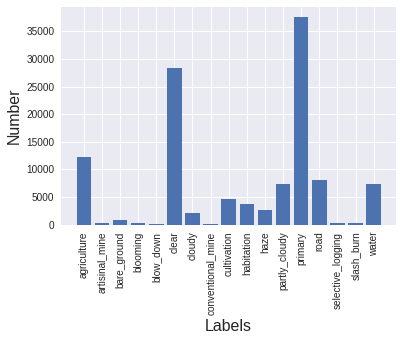

In [11]:
# Exploring the target variable class

train_tags = {}
for tags in train_labels_df['tags']:
    for tag in tags.split():
        if tag not in train_tags.keys():
    #         print("Not")
            train_tags[tag] = 0
        else:
            train_tags[tag] += 1
print(train_tags)
print("No. of Labels:", len(train_tags))
plt.bar(list(train_tags.keys()), list(train_tags.values()))
plt.xticks(rotation = 90)
plt.xlabel("Labels", fontsize = 16)
plt.ylabel("Number", fontsize = 16)
plt.show()

Label: agriculture clear habitation primary road
Shape: (256, 256, 4)
Max: 255 ,Min: 0


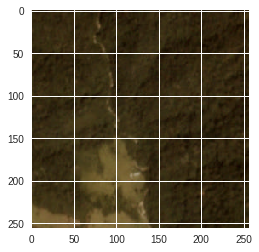

In [12]:
# A image from the dataset

i = 4
print("Label:", train_labels_df['tags'][i])
img_str = "train-jpg/train_" + str(i) + ".jpg"
img = plt.imread(img_str)
print("Shape:", img.shape)
print("Max:", img.max(), ",Min:", img.min())
plt.imshow(img)

# Create train and validation set

In [13]:
# print(type(img))
labels = list(train_tags.keys())
print("Labels are: " + str(labels))

Labels are: ['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


In [14]:
# Let's create a label_map for all the labels present

label_map = {}
inv_label_map = {}
inc = 0
for label in labels:
  label_map[label] = inc
  inv_label_map[inc] = label
  inc = inc + 1
print(label_map)
print(inv_label_map)

{'haze': 0, 'primary': 1, 'agriculture': 2, 'clear': 3, 'water': 4, 'habitation': 5, 'road': 6, 'cultivation': 7, 'slash_burn': 8, 'cloudy': 9, 'partly_cloudy': 10, 'conventional_mine': 11, 'bare_ground': 12, 'artisinal_mine': 13, 'blooming': 14, 'selective_logging': 15, 'blow_down': 16}
{0: 'haze', 1: 'primary', 2: 'agriculture', 3: 'clear', 4: 'water', 5: 'habitation', 6: 'road', 7: 'cultivation', 8: 'slash_burn', 9: 'cloudy', 10: 'partly_cloudy', 11: 'conventional_mine', 12: 'bare_ground', 13: 'artisinal_mine', 14: 'blooming', 15: 'selective_logging', 16: 'blow_down'}


In [0]:
import cv2
import numpy as np

In [0]:
x_train = []
y_train = []

In [0]:
# Making python list from the image data

for i, tags in (train_labels_df.values):
#   img = im.open('train-jpg/{}.jpg'.format(f))
  path = 'train-jpg/' + str(i) + '.jpg'
  targets = np.zeros(17)
  for t in tags.split(' '):
    targets[label_map[t]] = 1
  x_train.append(np.array(cv2.resize(img, (128, 128))))
  y_train.append(targets)

In [18]:


print(x_train[1], y_train[1])

[[[ 48  36  12 255]
  [ 51  39  15 255]
  [ 52  40  17 255]
  ...
  [ 48  32  10 255]
  [ 49  34  15 255]
  [ 53  38  14 255]]

 [[ 44  37  13 255]
  [ 46  37  14 255]
  [ 45  34  14 255]
  ...
  [ 51  31  10 255]
  [ 52  36  13 255]
  [ 56  41  14 255]]

 [[ 49  42  17 255]
  [ 51  41  17 255]
  [ 50  37  16 255]
  ...
  [ 52  36  12 255]
  [ 60  47  18 255]
  [ 62  51  21 255]]

 ...

 [[110  97  48 255]
  [117 101  52 255]
  [121 103  57 255]
  ...
  [ 45  37  13 255]
  [ 48  39  11 255]
  [ 44  36  12 255]]

 [[104  86  45 255]
  [113  93  50 255]
  [116  94  52 255]
  ...
  [ 44  35  11 255]
  [ 45  36   8 255]
  [ 40  31   6 255]]

 [[ 85  65  32 255]
  [ 95  74  38 255]
  [ 98  75  39 255]
  ...
  [ 50  37  15 255]
  [ 43  36  13 255]
  [ 44  34  11 255]]] [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# Making numpy array from list made earlier and normalising by dividing by 255
y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.
print(x_train.shape)
print(y_train.shape)

(40479, 128, 128, 4)
(40479, 17)


In [20]:
# x_train[0]
print((x_train[0]), (y_train[0]))

[[[0.1882  0.1412  0.04706 1.     ]
  [0.2     0.153   0.05884 1.     ]
  [0.204   0.1569  0.06665 1.     ]
  ...
  [0.1882  0.1255  0.0392  1.     ]
  [0.1921  0.1333  0.05884 1.     ]
  [0.2079  0.149   0.0549  1.     ]]

 [[0.1726  0.1451  0.051   1.     ]
  [0.1804  0.1451  0.0549  1.     ]
  [0.1765  0.1333  0.0549  1.     ]
  ...
  [0.2     0.1216  0.0392  1.     ]
  [0.204   0.1412  0.051   1.     ]
  [0.2196  0.1608  0.0549  1.     ]]

 [[0.1921  0.1647  0.06665 1.     ]
  [0.2     0.1608  0.06665 1.     ]
  [0.196   0.1451  0.06274 1.     ]
  ...
  [0.204   0.1412  0.04706 1.     ]
  [0.2354  0.1843  0.0706  1.     ]
  [0.2432  0.2     0.08234 1.     ]]

 ...

 [[0.4314  0.3804  0.1882  1.     ]
  [0.4587  0.396   0.204   1.     ]
  [0.4746  0.4038  0.2235  1.     ]
  ...
  [0.1765  0.1451  0.051   1.     ]
  [0.1882  0.153   0.04315 1.     ]
  [0.1726  0.1412  0.04706 1.     ]]

 [[0.408   0.3372  0.1765  1.     ]
  [0.443   0.3647  0.196   1.     ]
  [0.4548  0.3687  0.204  

In [21]:
# Splitting the data into Training, Validation and Test set

test_split = int(40479*0.8)
print("Training set + Validation set: ", test_split)
x_train, x_test, y_train, y_test = x_train[:test_split], x_train[test_split:], y_train[:test_split], y_train[test_split:]

valid_split = int(40479*0.6)
print("Training set: ", valid_split)
x_train, x_valid, y_train, y_valid = x_train[:valid_split], x_train[valid_split:], y_train[:valid_split], y_train[valid_split:]

print("Validation set: ", str(test_split - valid_split))
print("Test set: ", str(40479 - test_split))

Training set + Validation set:  32383
Training set:  24287
Validation set:  8096
Test set:  8096


In [22]:
# Simple verification of the size of 3 sets

24287+8096+8096

40479

# Let's Begin

In [0]:
# Importing the modules

import tensorflow as tf
from tensorflow.python.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.python.keras import Model, Sequential, optimizers

In [0]:
# Setting up some hyperparameters

batch_size = 128
epochs = 10
learning_rate = 0.001
num_classes = 17

In [0]:
# The architecture of the CNN Model

model = Sequential()

model.add(BatchNormalization(input_shape = (128, 128, 4)))

model.add(Conv2D(32, 
                kernel_size = (3,3), 
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(48,
                kernel_size = (3,3),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,
                kernel_size = (3,3),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.7))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))

model.add(Dense(num_classes, activation = 'sigmoid'))


In [26]:
# Summary of CNN architecture

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 4)       16        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 48)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        27712     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [27]:
# Training the model

opt = optimizers.Adam(lr = learning_rate)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
m = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                  batch_size=batch_size,verbose=2, epochs=epochs, shuffle = True)

Train on 24287 samples, validate on 8096 samples
Epoch 1/10
 - 43s - loss: 0.2619 - acc: 0.9027 - val_loss: 0.4096 - val_acc: 0.9054
Epoch 2/10
 - 39s - loss: 0.2576 - acc: 0.9050 - val_loss: 0.2795 - val_acc: 0.9054
Epoch 3/10
 - 39s - loss: 0.2569 - acc: 0.9050 - val_loss: 0.2576 - val_acc: 0.9054
Epoch 4/10
 - 39s - loss: 0.2567 - acc: 0.9050 - val_loss: 0.2566 - val_acc: 0.9054
Epoch 5/10
 - 39s - loss: 0.2564 - acc: 0.9050 - val_loss: 0.2571 - val_acc: 0.9054
Epoch 6/10
 - 39s - loss: 0.2566 - acc: 0.9050 - val_loss: 0.2569 - val_acc: 0.9054
Epoch 7/10
 - 39s - loss: 0.2565 - acc: 0.9050 - val_loss: 0.2565 - val_acc: 0.9054
Epoch 8/10
 - 39s - loss: 0.2567 - acc: 0.9050 - val_loss: 0.2565 - val_acc: 0.9054
Epoch 9/10
 - 39s - loss: 0.2562 - acc: 0.9050 - val_loss: 0.2565 - val_acc: 0.9054
Epoch 10/10
 - 39s - loss: 0.2567 - acc: 0.9050 - val_loss: 0.2564 - val_acc: 0.9054


In [28]:
# Running the model on test set

scores = model.evaluate(x_test, y_test, verbose = 1)
print(scores[1])

8096/8096 [==============================] - 7s 915us/step
0.9053853882160111


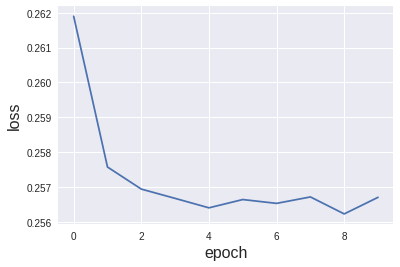

In [30]:
# Graph of loss per epoch

plt.plot(m.history['loss'])
plt.xlabel("epoch", fontsize = "16")
plt.ylabel("loss", fontsize = "16")
plt.show()